In [1]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


## Case study 
We are given the different datasets of a news channel which include business,entertainment,sports,technology and politics

we have to analyse and see all the news and generate a summary for BBC news channel

#### Importing Libraries

In [2]:
# Let us import the required libraries
import glob
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Initial Analysis

1) we need to ,create a dataset of each type of the news in bbc where each row will contain the news of a types

2) we need to clean the datasets

3) Generate news features like sentiment analysis

4) Plot word cloud

5) Do the TF_IDF of the datasets and analyse accordingly

6) Find the n-gram words

7) After fingding the bigrams look for the sentences related to it to analyse

### Making the files in each folder as a list and then making a dataframe of that folder

In [3]:
#making all the text files in a folder into a list and then converting it to a dataframe
def create_df(file,numer):
    final_list=[]
    for i in range(1,numer) :
        if (i< 10):
            sting_num=f'00{i}'
            filename=file+sting_num+'.txt'
            newfile = open(filename,'r')
            final_list.append(newfile.read())

        elif (i>=10) and (i<100):
            sting_num=f'0{i}'
            filename=file+sting_num+'.txt'
            newfile = open(filename,'r')
            final_list.append(newfile.read())

        else :
            filename=file+str(i)+'.txt'
            newfile= open(filename,'r')
            final_list.append(newfile.read())

    return final_list

In [4]:
#converting the business folder into a data frame
listing=[]
listing=create_df('business/',511)
business_df = pd.DataFrame(listing)
business_df.rename(columns = {0:'business'}, inplace = True)
business_df

,business
0,Ad sales boost Time Warner profit\n\nQuarterly...
1,Dollar gains on Greenspan speech\n\nThe dollar...
2,Yukos unit buyer faces loan claim\n\nThe owner...
3,High fuel prices hit BA's profits\n\nBritish A...
4,Pernod takeover talk lifts Domecq\n\nShares in...
...,...
505,Trial begins of Spain's top banker\n\nThe tria...
506,UK economy ends year with spurt\n\nThe UK econ...
507,HealthSouth ex-boss goes on trial\n\nThe forme...
508,Euro firms miss out on optimism\n\nMore than 9...


#### Analysis
 The dataframe for business folder with all the files which have 501 row and 1 column

In [5]:
#converting the entertainment folder into a data frame
listin=[]
listin=create_df('entertainment/',387)
entertainment_df = pd.DataFrame(listin)
entertainment_df.rename(columns = {0:'entertainment'}, inplace = True)
entertainment_df

,entertainment
0,Gallery unveils interactive tree\n\nA Christma...
1,Jarre joins fairytale celebration\n\nFrench mu...
2,Musical treatment for Capra film\n\nThe classi...
3,Richard and Judy choose top books\n\nThe 10 au...
4,Poppins musical gets flying start\n\nThe stage...
...,...
381,Last Star Wars 'not for children'\n\nThe sixth...
382,French honour for director Parker\n\nBritish f...
383,Robots march to US cinema summit\n\nAnimated m...
384,Hobbit picture 'four years away'\n\nLord of th...


#### Analysis
 The dataframe for entertainment folder with all the files which have 386 row and 1 column

In [6]:
#converting the politics folder into a data frame
listin=[]
listin=create_df('politics/',418)
politics_df = pd.DataFrame(listin)
politics_df.rename(columns = {0:'politics'}, inplace = True)
politics_df

,politics
0,Labour plans maternity pay rise\n\nMaternity p...
1,Watchdog probes e-mail deletions\n\nThe inform...
2,Hewitt decries 'career sexism'\n\nPlans to ext...
3,Labour chooses Manchester\n\nThe Labour Party ...
4,Brown ally rejects Budget spree\n\nChancellor ...
...,...
412,Sainsbury's Labour election gift\n\nScience Mi...
413,Blair 'up for it' ahead of poll\n\nTony Blair ...
414,Labour MP praises Tory campaign\n\nThe Conserv...
415,Top Tories on Lib Dem 'hit list'\n\nThe Libera...


#### Analysis
 The dataframe for politics folder with all the files which have 417 row and 1 column

In [7]:
#converting the sport folder into a data frame
listin=[]
listin=create_df('sport/',512)
sport_df = pd.DataFrame(listin)
sport_df.rename(columns = {0:'sport'}, inplace = True)
sport_df

,sport
0,Claxton hunting first major medal\n\nBritish h...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,Greene sets sights on world title\n\nMaurice G...
3,IAAF launches fight against drugs\n\nThe IAAF ...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'..."
...,...
506,Big guns ease through in San Jose\n\nTop-seede...
507,Almagro continues Spanish surge\n\nUnseeded Ni...
508,Melzer shocks Agassi in San Jose\n\nSecond see...
509,Mirza makes Indian tennis history\n\nTeenager ...


#### Analysis
 The dataframe for entertainment folder with all the files which have 511 row and 1 column

In [8]:
#converting the tech folder into a data frame
listin=[]
listin=create_df('tech/',402)
tech_df = pd.DataFrame(listin)
tech_df.rename(columns = {0:'tech'}, inplace = True)
tech_df

,tech
0,Ink helps drive democracy in Asia\n\nThe Kyrgy...
1,China net cafe culture crackdown\n\nChinese au...
2,Microsoft seeking spyware trojan\n\nMicrosoft ...
3,Digital guru floats sub-$100 PC\n\nNicholas Ne...
4,Technology gets the creative bug\n\nThe hi-tec...
...,...
396,BT program to beat dialler scams\n\nBT is intr...
397,Spam e-mails tempt net shoppers\n\nComputer us...
398,Be careful how you code\n\nA new European dire...
399,US cyber security chief resigns\n\nThe man mak...


#### Analysis
 The dataframe for entertainment folder with all the files which have 401 row and 1 column

## Dataset Description

In [9]:
#Checking for null values in the dataset of tech
tech_df.isnull().sum()

tech    0
dtype: int64

#### Analysis
their are no null values present

In [10]:
#Checking for null values in the dataset of sport
sport_df.isnull().sum()

sport    0
dtype: int64

#### Analysis
their are no null values present

In [11]:
#Checking for null values in the dataset of politics
politics_df.isnull().sum()

politics    0
dtype: int64

#### Analysis
their are no null values present

In [12]:
#Checking for null values in the dataset of entertainment
entertainment_df.isnull().sum()

entertainment    0
dtype: int64

#### Analysis
their are no null values present

In [13]:
#Checking for null values in the dataset of business
business_df.isnull().sum()

business    0
dtype: int64

#### Analysis
their are no null values present

In [14]:
#describing the data frame to see the unique values
business_df.describe()

,business
count,510
unique,503
top,Singapore growth at 8.1% in 2004\n\nSingapore'...
freq,2


#### Analysis
very less unique values are present

In [15]:
#describing the data frame to see the unique values
sport_df.describe()

,sport
count,511
unique,505
top,Spain coach faces racism inquiry\n\nSpain's Fo...
freq,2


#### Analysis
very less unique values are present

In [16]:
#describing the data frame to see the unique values
entertainment_df.describe()

,entertainment
count,386
unique,369
top,Pop band Busted to 'take a break'\n\nChart-top...
freq,2


#### Analysis
very less unique values are present

In [17]:
#describing the data frame to see the unique values
politics_df.describe()

,politics
count,417
unique,403
top,Brown outlines third term vision\n\nGordon Bro...
freq,2


#### Analysis
very less unique values are present

In [18]:
#describing the data frame to see the unique values
tech_df.describe()

,tech
count,401
unique,347
top,Mobiles 'not media players yet'\n\nMobiles are...
freq,2


#### Analysis
very less unique values are present

## Text normalization

#### Tokenization

In [19]:
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from bs4 import BeautifulSoup

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

### Removing stopwords

In [21]:
#importing nltk
import nltk
#downloading nltk features
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Subhajit_Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhajit_Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data cleaning

In [22]:
## cleaning the text and removing stopwords
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
stopword.remove('no')
stopword.remove('not')

def clean(text):
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhajit_Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#callig the business dataframe
business_df['business']=business_df['business'].apply(clean)
business_df

,business
0,Ad sales boost Time Warner profitQuarterly pro...
1,Dollar gains Greenspan speechThe dollar hit hi...
2,Yukos unit buyer faces loan claimThe owners em...
3,High fuel prices hit BAs profitsBritish Airway...
4,Pernod takeover talk lifts DomecqShares UK dri...
...,...
505,Trial begins Spains top bankerThe trial Emilio...
506,UK economy ends year spurtThe UK economy grew ...
507,HealthSouth exboss goes trialThe former head U...
508,Euro firms miss optimismMore large companies ...


#### Analysis
the new dataframe after cleaning

In [24]:
#callig the entertainment dataframe
entertainment_df['entertainment']=entertainment_df['entertainment'].apply(clean)
entertainment_df

,entertainment
0,Gallery unveils interactive treeA Christmas tr...
1,Jarre joins fairytale celebrationFrench musici...
2,Musical treatment Capra filmThe classic film I...
3,Richard Judy choose top booksThe authors shor...
4,Poppins musical gets flying startThe stage ada...
...,...
381,Last Star Wars not childrenThe sixth final Sta...
382,French honour director ParkerBritish film dire...
383,Robots march US cinema summitAnimated movie Ro...
384,Hobbit picture four years awayLord Rings direc...


#### Analysis
the new dataframe after cleaning

In [25]:
#callig the politics dataframe
politics_df['politics']=politics_df['politics'].apply(clean)
politics_df

,politics
0,Labour plans maternity pay riseMaternity pay n...
1,Watchdog probes email deletionsThe information...
2,Hewitt decries career sexismPlans extend paid ...
3,Labour chooses ManchesterThe Labour Party hold...
4,Brown ally rejects Budget spreeChancellor Gord...
...,...
412,Sainsburys Labour election giftScience Ministe...
413,Blair ahead pollTony Blair says personal stand...
414,Labour MP praises Tory campaignThe Conservativ...
415,Top Tories Lib Dem hit listThe Liberal Democra...


#### Analysis
the new dataframe after cleaning

In [26]:
#callig the sport dataframe
sport_df['sport']=sport_df['sport'].apply(clean)
sport_df

,sport
0,Claxton hunting first major medalBritish hurdl...
1,OSullivan could run WorldsSonia OSullivan indi...
2,Greene sets sights world titleMaurice Greene a...
3,IAAF launches fight drugsThe IAAF athletics w...
4,Dibaba breaks world recordEthiopias Tirunesh ...
...,...
506,Big guns ease San JoseTopseeded Americans Andy...
507,Almagro continues Spanish surgeUnseeded Nicola...
508,Melzer shocks Agassi San JoseSecond seed Andre...
509,Mirza makes Indian tennis historyTeenager Sani...


#### Analysis
the new dataframe after cleaning

In [27]:
#callig the tech dataframe
tech_df['tech']=tech_df['tech'].apply(clean)
tech_df

,tech
0,Ink helps drive democracy AsiaThe Kyrgyz Repub...
1,China net cafe culture crackdownChinese author...
2,Microsoft seeking spyware trojanMicrosoft inve...
3,Digital guru floats PCNicholas Negroponte cha...
4,Technology gets creative bugThe hitech arts wo...
...,...
396,BT program beat dialler scamsBT introducing tw...
397,Spam emails tempt net shoppersComputer users a...
398,Be careful codeA new European directive could ...
399,US cyber security chief resignsThe man making ...


#### Analysis
the new dataframe after cleaning

### lemmatization of text

In [28]:
#performing lematization
lemamat=nltk.stem.WordNetLemmatizer()
def lemmatizer(text):
    text= " ".join([lemamat.lemmatize(word) for word in text.split(" ")])
    return text

In [29]:
#performing lematization on tech 
tech_df['tech']=tech_df['tech'].apply(lemmatizer)
tech_df

,tech
0,Ink help drive democracy AsiaThe Kyrgyz Republ...
1,China net cafe culture crackdownChinese author...
2,Microsoft seeking spyware trojanMicrosoft inve...
3,Digital guru float PCNicholas Negroponte chai...
4,Technology get creative bugThe hitech art worl...
...,...
396,BT program beat dialler scamsBT introducing tw...
397,Spam email tempt net shoppersComputer user acr...
398,Be careful codeA new European directive could ...
399,US cyber security chief resignsThe man making ...


#### Analysis 
dataset after performing lematization

In [30]:
#performing lematization on sport
sport_df['sport']=sport_df['sport'].apply(lemmatizer)
sport_df

,sport
0,Claxton hunting first major medalBritish hurdl...
1,OSullivan could run WorldsSonia OSullivan indi...
2,Greene set sight world titleMaurice Greene aim...
3,IAAF launch fight drugsThe IAAF athletics wor...
4,Dibaba break world recordEthiopias Tirunesh D...
...,...
506,Big gun ease San JoseTopseeded Americans Andy ...
507,Almagro continues Spanish surgeUnseeded Nicola...
508,Melzer shock Agassi San JoseSecond seed Andre ...
509,Mirza make Indian tennis historyTeenager Sania...


#### Analysis 
dataset after performing lematization

In [31]:
#performing lematization on politics
politics_df['politics']=politics_df['politics'].apply(lemmatizer)
politics_df

,politics
0,Labour plan maternity pay riseMaternity pay ne...
1,Watchdog probe email deletionsThe information ...
2,Hewitt decries career sexismPlans extend paid ...
3,Labour chooses ManchesterThe Labour Party hold...
4,Brown ally reject Budget spreeChancellor Gordo...
...,...
412,Sainsburys Labour election giftScience Ministe...
413,Blair ahead pollTony Blair say personal standi...
414,Labour MP praise Tory campaignThe Conservative...
415,Top Tories Lib Dem hit listThe Liberal Democra...


#### Analysis 
dataset after performing lematization

In [32]:
#performing lematization entertainment
entertainment_df['entertainment']=entertainment_df['entertainment'].apply(lemmatizer)
entertainment_df

,entertainment
0,Gallery unveils interactive treeA Christmas tr...
1,Jarre join fairytale celebrationFrench musicia...
2,Musical treatment Capra filmThe classic film I...
3,Richard Judy choose top booksThe author short...
4,Poppins musical get flying startThe stage adap...
...,...
381,Last Star Wars not childrenThe sixth final Sta...
382,French honour director ParkerBritish film dire...
383,Robots march US cinema summitAnimated movie Ro...
384,Hobbit picture four year awayLord Rings direct...


#### Analysis 
dataset after performing lematization

In [33]:
#performing lematization on business 
business_df['business']=business_df['business'].apply(lemmatizer)
business_df

,business
0,Ad sale boost Time Warner profitQuarterly prof...
1,Dollar gain Greenspan speechThe dollar hit hig...
2,Yukos unit buyer face loan claimThe owner emba...
3,High fuel price hit BAs profitsBritish Airways...
4,Pernod takeover talk lift DomecqShares UK drin...
...,...
505,Trial begin Spains top bankerThe trial Emilio ...
506,UK economy end year spurtThe UK economy grew e...
507,HealthSouth exboss go trialThe former head US ...
508,Euro firm miss optimismMore large company aro...


#### Analysis 
dataset after performing lematization

## Derviving new features

### Sentiment analysis

In [34]:
#performing sentiment analysis
nltk.download('vader_lexicon')
def sentimental_analysis(df,col):
    sentiments = SentimentIntensityAnalyzer()
    df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df[col]]
    df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df[col]]
    df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df[col]]
    df = df[[col, "Positive", "Negative", "Neutral"]]
    return df

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Subhajit_Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [35]:
#performing sentiment analysis on business
business_df=sentimental_analysis(business_df,'business')
business_df

,business,Positive,Negative,Neutral
0,Ad sale boost Time Warner profitQuarterly prof...,0.252,0.044,0.704
1,Dollar gain Greenspan speechThe dollar hit hig...,0.139,0.073,0.788
2,Yukos unit buyer face loan claimThe owner emba...,0.055,0.125,0.820
3,High fuel price hit BAs profitsBritish Airways...,0.171,0.059,0.770
4,Pernod takeover talk lift DomecqShares UK drin...,0.106,0.057,0.838
...,...,...,...,...
505,Trial begin Spains top bankerThe trial Emilio ...,0.116,0.110,0.774
506,UK economy end year spurtThe UK economy grew e...,0.132,0.063,0.804
507,HealthSouth exboss go trialThe former head US ...,0.118,0.201,0.682
508,Euro firm miss optimismMore large company aro...,0.136,0.118,0.745


In [36]:
#describing the dataset after lematization
business_df.describe()

,Positive,Negative,Neutral
count,510.000000,510.000000,510.000000
mean,0.138441,0.103725,0.757804
std,0.056217,0.064371,0.068430
min,0.021000,0.000000,0.525000
25%,0.097250,0.054000,0.707000
50%,0.132000,0.102000,0.758000
75%,0.177750,0.145750,0.803000
max,0.350000,0.363000,0.979000


### Analysis
from the above we can see the the mean and 50%(median) of the neutral sentiment is the highest as compared to positive or negetive so we can say that most of the text are statements

In [37]:
#performing sentiment analysis on business
entertainment_df=sentimental_analysis(entertainment_df,'entertainment')
entertainment_df

,entertainment,Positive,Negative,Neutral
0,Gallery unveils interactive treeA Christmas tr...,0.088,0.026,0.886
1,Jarre join fairytale celebrationFrench musicia...,0.159,0.028,0.813
2,Musical treatment Capra filmThe classic film I...,0.181,0.029,0.789
3,Richard Judy choose top booksThe author short...,0.318,0.042,0.640
4,Poppins musical get flying startThe stage adap...,0.080,0.041,0.879
...,...,...,...,...
381,Last Star Wars not childrenThe sixth final Sta...,0.044,0.264,0.692
382,French honour director ParkerBritish film dire...,0.206,0.048,0.746
383,Robots march US cinema summitAnimated movie Ro...,0.198,0.038,0.764
384,Hobbit picture four year awayLord Rings direct...,0.156,0.045,0.799


In [38]:
#describing the dataset after lematization
entertainment_df.describe()

,Positive,Negative,Neutral
count,386.000000,386.000000,386.000000
mean,0.185469,0.076953,0.737565
std,0.091147,0.061572,0.084482
min,0.000000,0.000000,0.457000
25%,0.118750,0.032250,0.686000
50%,0.171500,0.062000,0.740500
75%,0.233750,0.108000,0.795000
max,0.492000,0.319000,0.932000


### Analysis
from the above we can see the the mean and 50%(median) of the neutral sentiment is the highest as compared to positive or negetive so we can say that most of the text are statements

In [39]:
#performing sentiment analysis on politics
politics_df=sentimental_analysis(politics_df,'politics')
politics_df

,politics,Positive,Negative,Neutral
0,Labour plan maternity pay riseMaternity pay ne...,0.089,0.088,0.822
1,Watchdog probe email deletionsThe information ...,0.181,0.139,0.680
2,Hewitt decries career sexismPlans extend paid ...,0.109,0.050,0.841
3,Labour chooses ManchesterThe Labour Party hold...,0.171,0.066,0.763
4,Brown ally reject Budget spreeChancellor Gordo...,0.182,0.068,0.750
...,...,...,...,...
412,Sainsburys Labour election giftScience Ministe...,0.379,0.043,0.578
413,Blair ahead pollTony Blair say personal standi...,0.091,0.137,0.771
414,Labour MP praise Tory campaignThe Conservative...,0.182,0.121,0.697
415,Top Tories Lib Dem hit listThe Liberal Democra...,0.202,0.087,0.711


In [40]:
#describing the dataset after lematization
politics_df.describe()

,Positive,Negative,Neutral
count,417.000000,417.000000,417.000000
mean,0.139269,0.126017,0.734703
std,0.054205,0.066732,0.076110
min,0.000000,0.000000,0.479000
25%,0.098000,0.078000,0.687000
50%,0.134000,0.118000,0.734000
75%,0.171000,0.166000,0.785000
max,0.379000,0.425000,0.926000


### Analysis
from the above we can see the the mean and 50%(median) of the neutral sentiment is the highest as compared to positive or negetive so we can say that most of the text are statements

In [41]:
#performing sentiment analysis on sport
sport_df=sentimental_analysis(sport_df,'sport')
sport_df

,sport,Positive,Negative,Neutral
0,Claxton hunting first major medalBritish hurdl...,0.206,0.046,0.748
1,OSullivan could run WorldsSonia OSullivan indi...,0.130,0.000,0.870
2,Greene set sight world titleMaurice Greene aim...,0.092,0.102,0.806
3,IAAF launch fight drugsThe IAAF athletics wor...,0.100,0.066,0.834
4,Dibaba break world recordEthiopias Tirunesh D...,0.180,0.089,0.730
...,...,...,...,...
506,Big gun ease San JoseTopseeded Americans Andy ...,0.207,0.147,0.646
507,Almagro continues Spanish surgeUnseeded Nicola...,0.216,0.093,0.691
508,Melzer shock Agassi San JoseSecond seed Andre ...,0.270,0.117,0.613
509,Mirza make Indian tennis historyTeenager Sania...,0.177,0.125,0.698


### Analysis
from the above we can see the the mean and 50%(median) of the neutral sentiment is the highest as compared to positive or negetive so we can say that most of the text are statements

In [42]:
#describing the dataset after lematization
sport_df.describe()

,Positive,Negative,Neutral
count,511.000000,511.000000,511.000000
mean,0.191186,0.102695,0.706125
std,0.080363,0.063288,0.082013
min,0.000000,0.000000,0.461000
25%,0.133000,0.057000,0.648000
50%,0.187000,0.094000,0.702000
75%,0.245000,0.139000,0.759500
max,0.472000,0.408000,1.000000


### Analysis
from the above we can see the the mean and 50%(median) of the neutral sentiment is the highest as compared to positive or negetive so we can say that most of the text are statements

In [43]:
#performing sentiment analysis on tech
tech_df=sentimental_analysis(tech_df,'tech')
tech_df

,tech,Positive,Negative,Neutral
0,Ink help drive democracy AsiaThe Kyrgyz Republ...,0.111,0.051,0.838
1,China net cafe culture crackdownChinese author...,0.067,0.131,0.801
2,Microsoft seeking spyware trojanMicrosoft inve...,0.098,0.083,0.819
3,Digital guru float PCNicholas Negroponte chai...,0.085,0.045,0.869
4,Technology get creative bugThe hitech art worl...,0.275,0.028,0.697
...,...,...,...,...
396,BT program beat dialler scamsBT introducing tw...,0.158,0.080,0.762
397,Spam email tempt net shoppersComputer user acr...,0.152,0.214,0.635
398,Be careful codeA new European directive could ...,0.130,0.137,0.733
399,US cyber security chief resignsThe man making ...,0.188,0.182,0.629


In [44]:
#describing the dataset after lematization
tech_df.describe()

,Positive,Negative,Neutral
count,401.000000,401.000000,401.000000
mean,0.138175,0.074165,0.787663
std,0.055379,0.059281,0.074787
min,0.028000,0.000000,0.572000
25%,0.099000,0.030000,0.735000
50%,0.128000,0.055000,0.796000
75%,0.168000,0.111000,0.846000
max,0.428000,0.278000,0.964000


### Analysis
from the above we can see the the mean and 50%(median) of the neutral sentiment is the highest as compared to positive or negetive so we can say that most of the text are statements

## Visualisation of the text

In [45]:
#using word cloud to visualise datasets
def wordcloud_generate(df,col):    
    text = " ".join(i for i in df[col])
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, 
                          background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

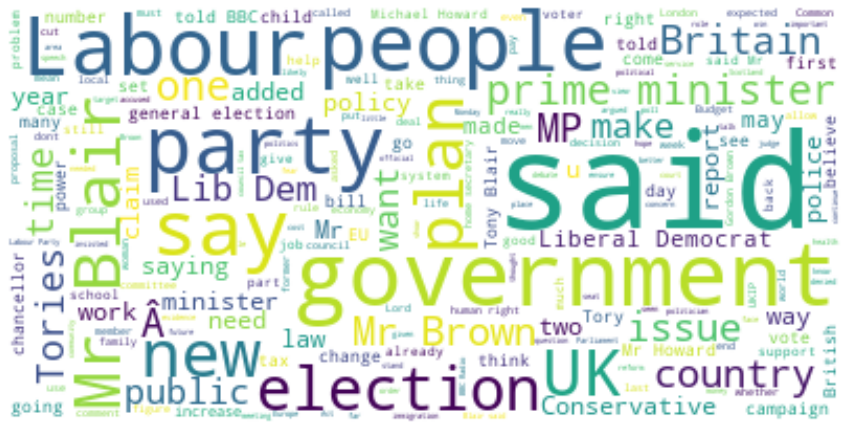

In [46]:
#using word cloud to visualise politics datasets
wordcloud_generate(politics_df,'politics')

### Analysis 
from the above wordcloud we can see that in politics dataset 'election','labour','said',people,government,party,minister are the most bold words

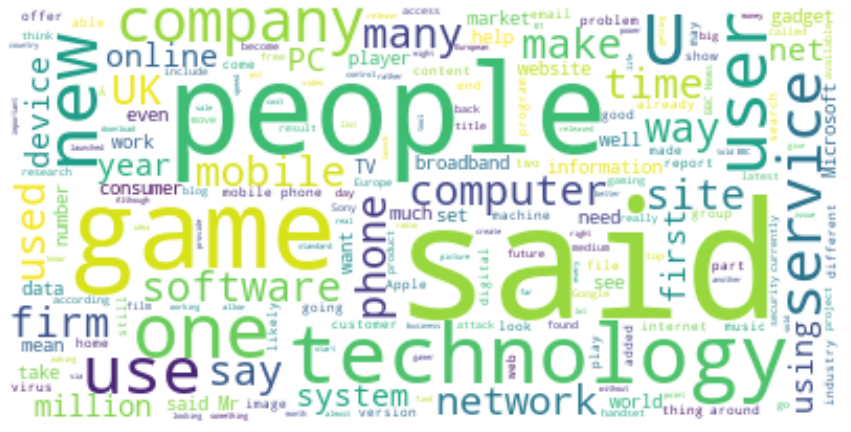

In [47]:
#using word cloud to visualise tech datasets
wordcloud_generate(tech_df,'tech')

### Analysis 
from the above wordcloud we can see that in tech dataset 'technolgy','game','said',people,computer,service are the most bold words

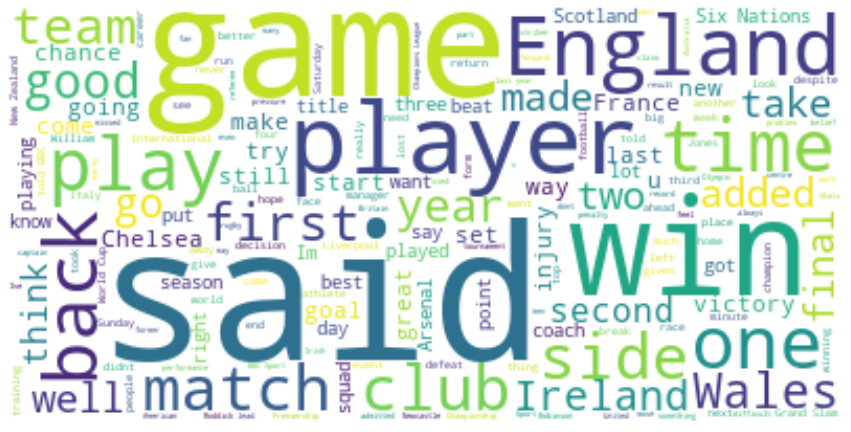

In [48]:
#using word cloud to visualise sport datasets
wordcloud_generate(sport_df,'sport')

### Analysis 
from the above wordcloud we can see that in sport dataset 'game','player','said',England,club,match are the most bold words

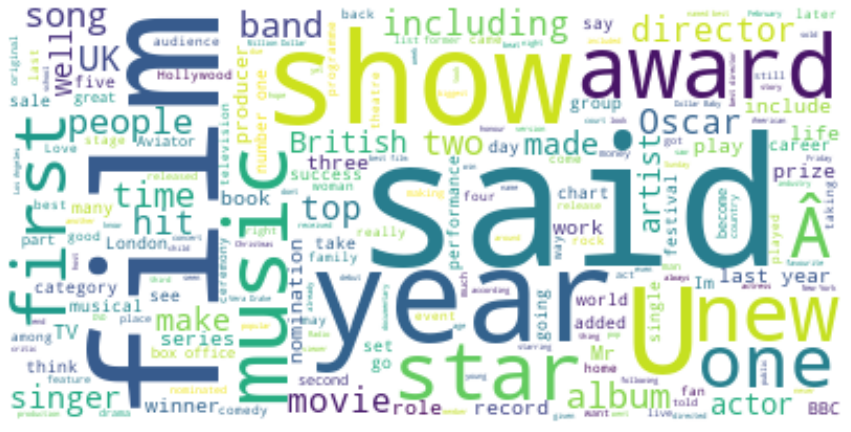

In [49]:
#using word cloud to visualise entertainment datasets
wordcloud_generate(entertainment_df,'entertainment')

### Analysis 
from the above wordcloud we can see that in entertainment dataset 'flim','award','said',star,director are the most bold words

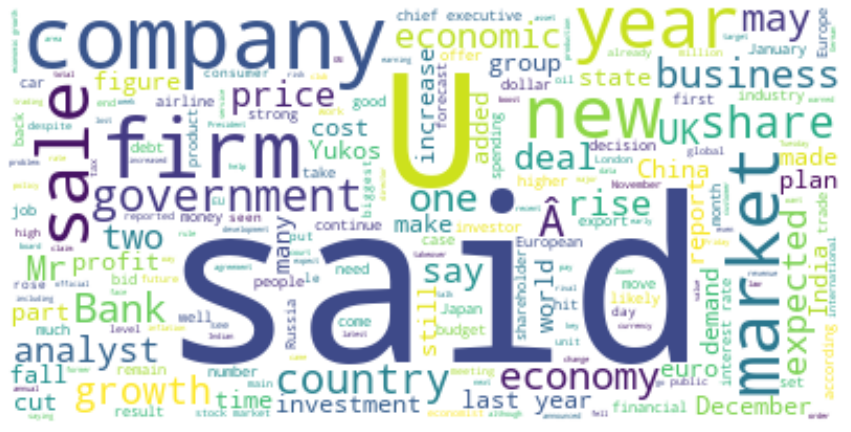

In [50]:
#using word cloud to visualise business datasets
wordcloud_generate(business_df,'business')

### Analysis 
from the above wordcloud we can see that in business dataset 'firm','company','said',market,government are the most bold words

## Keyword Extraction

In [51]:
#downloading en in spacy
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [52]:
#Tried to seperate the noun or adjective or pronoun keywords from the sentence 
nltk.download('punkt')
stop_words = stopwords.words('english')
def get_keywords(row):
    pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
    some_text = row['business']
    lowered = some_text.lower()
    tokens = nltk.tokenize.word_tokenize(lowered)
    
    keywords = [keyword for keyword in tokens if  keyword in pos_tag]
    keywords_string = ','.join(keywords)
    return keywords_string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Subhajit_Chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Comment
tried to seperate and find the keywords based on pronoun,adjective or nouon to do analysis and see the important or relevant words presents

In [133]:
#ectracting the noun from a sentence
def extract(sentence):
    from nltk import word_tokenize, pos_tag
    #sentence = "Ad sale boost Time Warner profit Quarterly prof"
    nouns = [token for token, pos in pos_tag(word_tokenize(sentence)) if pos.startswith('N')]
    return nouns

In [134]:
#seperating the nouns from each file in business and storing in a new column to as keywords
business_df['keywords'] = business_df['business'].apply(extract)
business_df

,business,Positive,Negative,Neutral,keywords
0,Ad sale boost Time Warner profitQuarterly prof...,0.252,0.044,0.704,"[Ad, sale, boost, Time, Warner, US, medium, gi..."
1,Dollar gain Greenspan speechThe dollar hit hig...,0.139,0.073,0.788,"[gain, Greenspan, dollar, level, euro, month, ..."
2,Yukos unit buyer face loan claimThe owner emba...,0.055,0.125,0.820,"[Yukos, unit, buyer, face, loan, claimThe, own..."
3,High fuel price hit BAs profitsBritish Airways...,0.171,0.059,0.770,"[fuel, price, BAs, Airways, fuel, price, drop,..."
4,Pernod takeover talk lift DomecqShares UK drin...,0.106,0.057,0.838,"[Pernod, takeover, talk, lift, DomecqShares, U..."
...,...,...,...,...,...
505,Trial begin Spains top bankerThe trial Emilio ...,0.116,0.110,0.774,"[begin, Spains, bankerThe, trial, Emilio, Boti..."
506,UK economy end year spurtThe UK economy grew e...,0.132,0.063,0.804,"[UK, economy, end, year, spurtThe, UK, economy..."
507,HealthSouth exboss go trialThe former head US ...,0.118,0.201,0.682,"[HealthSouth, exboss, head, US, service, firm,..."
508,Euro firm miss optimismMore large company aro...,0.136,0.118,0.745,"[Euro, firm, company, world, prospect, survey,..."


In [136]:
#making a dataset for keywords 
keyword_df=business_df['keywords'].reset_index()
keyword_df

,index,keywords
0,0,"[Ad, sale, boost, Time, Warner, US, medium, gi..."
1,1,"[gain, Greenspan, dollar, level, euro, month, ..."
2,2,"[Yukos, unit, buyer, face, loan, claimThe, own..."
3,3,"[fuel, price, BAs, Airways, fuel, price, drop,..."
4,4,"[Pernod, takeover, talk, lift, DomecqShares, U..."
...,...,...
505,505,"[begin, Spains, bankerThe, trial, Emilio, Boti..."
506,506,"[UK, economy, end, year, spurtThe, UK, economy..."
507,507,"[HealthSouth, exboss, head, US, service, firm,..."
508,508,"[Euro, firm, company, world, prospect, survey,..."


In [137]:
#seperating the features in each column row wise to give a detailed analysis
dum=(keyword_df.set_index(['index'])
   .apply(lambda x: x.str.split(',').explode())
   .reset_index())
dum

,index,keywords
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN
...,...,...
505,505,NaN
506,506,NaN
507,507,NaN
508,508,NaN


#### Comment 
preveiously the keyword was getting seperated and displayed by now all NAN values are coming could not figure out the reason
this was done so that in next Step I get the value count of the top 10 most noun keyword used in the dataset and I planned to do it for all datasets

In [138]:
#seeing which feature has occured most frequently
features=dum.keywords.value_counts().head(10).reset_index()
features

,index,keywords


In [139]:
#seperating the nouns from each file in entertainment and storing in a new column to as keywords
entertainment_df['keywords'] = entertainment_df['entertainment'].apply(extract)
entertainment_df

,entertainment,Positive,Negative,Neutral,keywords
0,Gallery unveils interactive treeA Christmas tr...,0.088,0.026,0.886,"[Gallery, treeA, Christmas, tree, receive, tex..."
1,Jarre join fairytale celebrationFrench musicia...,0.159,0.028,0.813,"[Jarre, join, fairytale, celebrationFrench, Je..."
2,Musical treatment Capra filmThe classic film I...,0.181,0.029,0.789,"[treatment, Capra, filmThe, film, A, Wonderful..."
3,Richard Judy choose top booksThe author short...,0.318,0.042,0.640,"[Richard, Judy, booksThe, author, Richard, Jud..."
4,Poppins musical get flying startThe stage adap...,0.080,0.041,0.879,"[Poppins, startThe, stage, adaptation, film, M..."
...,...,...,...,...,...
381,Last Star Wars not childrenThe sixth final Sta...,0.044,0.264,0.692,"[Star, Wars, Star, Wars, movie, child, filmmak..."
382,French honour director ParkerBritish film dire...,0.206,0.048,0.746,"[honour, director, ParkerBritish, film, direct..."
383,Robots march US cinema summitAnimated movie Ro...,0.198,0.038,0.764,"[Robots, US, cinema, movie, Robots, US, Canada..."
384,Hobbit picture four year awayLord Rings direct...,0.156,0.045,0.799,"[Hobbit, picture, year, awayLord, Rings, direc..."


In [140]:
#seperating the nouns from each file in sport and storing in a new column to as keywords
sport_df['keywords'] = sport_df['sport'].apply(extract)
sport_df

,sport,Positive,Negative,Neutral,keywords
0,Claxton hunting first major medalBritish hurdl...,0.206,0.046,0.748,"[Claxton, hurdler, Sarah, Claxton, confident, ..."
1,OSullivan could run WorldsSonia OSullivan indi...,0.130,0.000,0.870,"[OSullivan, WorldsSonia, OSullivan, month, Wor..."
2,Greene set sight world titleMaurice Greene aim...,0.092,0.102,0.806,"[Greene, world, titleMaurice, Greene, aim, wip..."
3,IAAF launch fight drugsThe IAAF athletics wor...,0.100,0.066,0.834,"[IAAF, launch, IAAF, athletics, world, body, c..."
4,Dibaba break world recordEthiopias Tirunesh D...,0.180,0.089,0.730,"[Dibaba, break, world, recordEthiopias, Tirune..."
...,...,...,...,...,...
506,Big gun ease San JoseTopseeded Americans Andy ...,0.207,0.147,0.646,"[gun, ease, San, JoseTopseeded, Americans, And..."
507,Almagro continues Spanish surgeUnseeded Nicola...,0.216,0.093,0.691,"[Almagro, Spanish, Nicolas, Almagro, Spaniard,..."
508,Melzer shock Agassi San JoseSecond seed Andre ...,0.270,0.117,0.613,"[Melzer, shock, Agassi, San, JoseSecond, seed,..."
509,Mirza make Indian tennis historyTeenager Sania...,0.177,0.125,0.698,"[Mirza, tennis, historyTeenager, Sania, Mirza,..."


In [141]:
#seperating the nouns from each file in tech and storing in a new column to as keywords
tech_df['keywords'] = tech_df['tech'].apply(extract)
tech_df

,tech,Positive,Negative,Neutral,keywords
0,Ink help drive democracy AsiaThe Kyrgyz Republ...,0.111,0.051,0.838,"[Ink, help, drive, democracy, AsiaThe, Kyrgyz,..."
1,China net cafe culture crackdownChinese author...,0.067,0.131,0.801,"[China, culture, authority, cafe, month, count..."
2,Microsoft seeking spyware trojanMicrosoft inve...,0.098,0.083,0.819,"[Microsoft, spyware, program, attempt, switch,..."
3,Digital guru float PCNicholas Negroponte chai...,0.085,0.045,0.869,"[Digital, guru, float, PCNicholas, Negroponte,..."
4,Technology get creative bugThe hitech art worl...,0.275,0.028,0.697,"[Technology, bugThe, hitech, art, world, time,..."
...,...,...,...,...,...
396,BT program beat dialler scamsBT introducing tw...,0.158,0.080,0.762,"[BT, program, beat, dialler, scamsBT, help, di..."
397,Spam email tempt net shoppersComputer user acr...,0.152,0.214,0.635,"[Spam, shoppersComputer, user, world, security..."
398,Be careful codeA new European directive could ...,0.130,0.137,0.733,"[directive, software, writer, risk, action, pr..."
399,US cyber security chief resignsThe man making ...,0.188,0.182,0.629,"[security, chief, resignsThe, man, US, compute..."


In [142]:
#seperating the nouns from each file in politics and storing in a new column to as keywords
politics_df['keywords'] = politics_df['politics'].apply(extract)
politics_df

,politics,Positive,Negative,Neutral,keywords
0,Labour plan maternity pay riseMaternity pay ne...,0.089,0.088,0.822,"[Labour, plan, maternity, riseMaternity, mothe..."
1,Watchdog probe email deletionsThe information ...,0.181,0.139,0.680,"[Watchdog, probe, information, commissioner, d..."
2,Hewitt decries career sexismPlans extend paid ...,0.109,0.050,0.841,"[Hewitt, decries, sexismPlans, maternity, mont..."
3,Labour chooses ManchesterThe Labour Party hold...,0.171,0.066,0.763,"[ManchesterThe, Labour, Party, conference, Man..."
4,Brown ally reject Budget spreeChancellor Gordo...,0.182,0.068,0.750,"[Brown, Budget, spreeChancellor, Gordon, Brown..."
...,...,...,...,...,...
412,Sainsburys Labour election giftScience Ministe...,0.379,0.043,0.578,"[Sainsburys, Labour, election, giftScience, Mi..."
413,Blair ahead pollTony Blair say personal standi...,0.091,0.137,0.771,"[Blair, Blair, standing, eye, voter, issue, mi..."
414,Labour MP praise Tory campaignThe Conservative...,0.182,0.121,0.697,"[Labour, MP, praise, Tory, campaignThe, Conser..."
415,Top Tories Lib Dem hit listThe Liberal Democra...,0.202,0.087,0.711,"[Tories, Lib, Dem, Liberal, Democrats, Tories,..."


#### Comment(TF_IDF)
Tried to find the tf-idf of the datasets to generate the words that that are occuring the most number of times and planned to do annalysis on what words appeared most number of times in sentence and then displaying 10 sentences of the word to analyse the news which revolves around those words

In [62]:
#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

## N-grams

### Unigrams

In [143]:
#Method to generate bigram words
from nltk.corpus import stopwords

def generate_ngrams(text,n_gram=1,stop=True ):
    stop=set(stopwords.words("english")) if  stop else {}
    stop.add(('said'))
    stop.add(('could'))
    stop.add(('would'))
    token = {
        token for token in text.lower().split(" ") if token !="" if token not in stop
    }
    token=list(token)
    z=zip(*[token[i:] for i in range(n_gram)])
    ngrams=[" ".join(ngram) for ngram in z]
    return ngrams

In [144]:
#importing defaultdict from collections
from collections import defaultdict

In [145]:
#generating a defaultdict for business bigram
disaster_Unigrams=defaultdict(int)


In [146]:
#generating the Unigrams
for business in business_df.business:
    for word in generate_ngrams(business):
        disaster_Unigrams[word]+=1

In [147]:
disaster_Unigrams

defaultdict(int,
            {'amount': 34,
             'marginstimewarner': 1,
             'needed': 36,
             'charge': 53,
             'service': 57,
             'stronger': 23,
             'stake': 45,
             'projecting': 2,
             'three': 124,
             'alexander': 6,
             'intends': 10,
             'rings': 1,
             'expectation': 30,
             'account': 64,
             'loss': 55,
             'owns': 29,
             'us': 248,
             'lord': 3,
             'online': 10,
             'grew': 31,
             'higher': 86,
             'previously': 40,
             'deal': 99,
             'final': 26,
             'music': 4,
             'offered': 23,
             'unable': 4,
             'month': 199,
             'effort': 47,
             'aols': 1,
             'performance': 39,
             'firm': 240,
             'exceptional': 3,
             'warner': 1,
             'google': 3,
             'chief': 170,

In [148]:
#getting the top 10 Unigrams sorted in descending order
df_disaster_Unigrams=pd.DataFrame(
    sorted(disaster_Unigrams.items(),key=lambda x: x[1],reverse=True)
)

In [149]:
#displaying the top 10 bigrams sorted in descending order
sorted(disaster_Unigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('year', 358),
 ('also', 281),
 ('â£', 272),
 ('company', 263),
 ('us', 248),
 ('firm', 240),
 ('market', 231),
 ('last', 228),
 ('new', 223),
 ('month', 199)]

#### Analysis 
we see that year is most number of unigram

<BarContainer object of 10 artists>

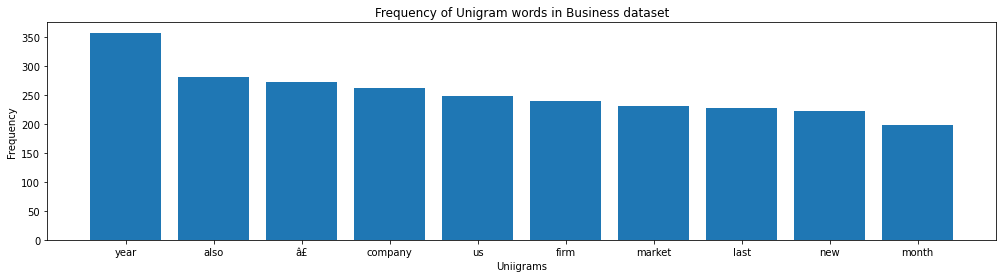

In [150]:
#plotting bar graph to see the frequency of bigrams in dataset 
d1=df_disaster_Unigrams[0][:10]
d2=df_disaster_Unigrams[1][:10]

plt.figure(1, figsize=(17,4))
plt.title("Frequency of Unigram words in Business dataset")
plt.xlabel('Uniigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
the most number of unigram word is year then also,company,US,firm

In [151]:
#generating a defaultdict for business bigram
enterainment_Unigrams=defaultdict(int)


In [152]:
#generating the Unigrams
for entertainment in entertainment_df.entertainment:
    for word in generate_ngrams(entertainment):
        enterainment_Unigrams[word]+=1

In [153]:
enterainment_Unigrams

defaultdict(int,
            {'string': 10,
             'everyday': 4,
             'christmas': 29,
             'photography': 1,
             'tree': 3,
             'londons': 21,
             'artists': 3,
             'charity': 23,
             'decorating': 1,
             'known': 32,
             'two': 140,
             'grew': 7,
             'year': 254,
             'packet': 1,
             'dress': 7,
             'jammed': 1,
             'childrens': 24,
             'art': 22,
             'unveils': 1,
             'previous': 24,
             'displayed': 1,
             'moore': 5,
             'norway': 3,
             'artist': 55,
             'tracey': 2,
             'subject': 10,
             'tate': 6,
             'bluetooth': 1,
             'unveiled': 6,
             'also': 230,
             'branch': 4,
             'unwrapped': 1,
             'wentworth': 1,
             'dimmed': 1,
             'light': 11,
             'sculptor': 1,
          

In [154]:
#getting the top 10 Unigrams sorted in descending order
df_entertainment_Unigrams=pd.DataFrame(
    sorted(enterainment_Unigrams.items(),key=lambda x: x[1],reverse=True)
)

In [155]:
#displaying the top 10 bigrams sorted in descending order
sorted(enterainment_Unigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('year', 254),
 ('also', 230),
 ('one', 204),
 ('film', 193),
 ('new', 175),
 ('star', 174),
 ('first', 163),
 ('us', 157),
 ('last', 149),
 ('show', 144)]

<BarContainer object of 10 artists>

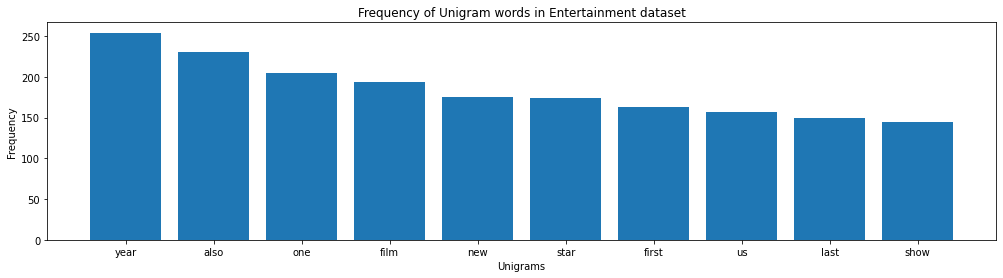

In [156]:
#plotting bar graph to see the frequency of Unigrams in dataset 
d1=df_entertainment_Unigrams[0][:10]
d2=df_entertainment_Unigrams[1][:10]

plt.figure(1, figsize=(17,4))
plt.title("Frequency of Unigram words in Entertainment dataset")
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


In [157]:
#generating a defaultdict for sport bigram
sport_Unigrams=defaultdict(int)


In [158]:
#generating the Unigrams
for sport in sport_df.sport:
    for word in generate_ngrams(sport):
        sport_Unigrams[word]+=1

In [159]:
#displaying the unigrams
sport_Unigrams

defaultdict(int,
            {'indoor': 38,
             'smashed': 6,
             'explain': 6,
             'long': 71,
             'indoors': 16,
             'mark': 76,
             'confident': 43,
             'season': 139,
             'three': 169,
             'hurdler': 3,
             'twice': 28,
             'owns': 2,
             'russian': 22,
             'year': 247,
             'favourite': 32,
             'fifthfastest': 1,
             'see': 105,
             'regime': 2,
             'european': 63,
             'month': 95,
             'major': 43,
             'previous': 20,
             'second': 168,
             'jump': 15,
             'national': 41,
             'madridthe': 2,
             'time': 232,
             'championships': 41,
             'also': 218,
             'hurdle': 15,
             'refocused': 1,
             'irina': 4,
             'attention': 10,
             'win': 244,
             'quite': 27,
             'keep': 54,
 

In [160]:
#getting the top 10 Unigrams sorted in descending order
df_sport_Unigrams=pd.DataFrame(
    sorted(sport_Unigrams.items(),key=lambda x: x[1],reverse=True)
)

In [161]:
#displaying the top 10 Unigrams sorted in descending order
sorted(sport_Unigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('game', 253),
 ('year', 247),
 ('last', 245),
 ('win', 244),
 ('time', 232),
 ('first', 232),
 ('player', 230),
 ('one', 226),
 ('two', 222),
 ('also', 218)]

<BarContainer object of 10 artists>

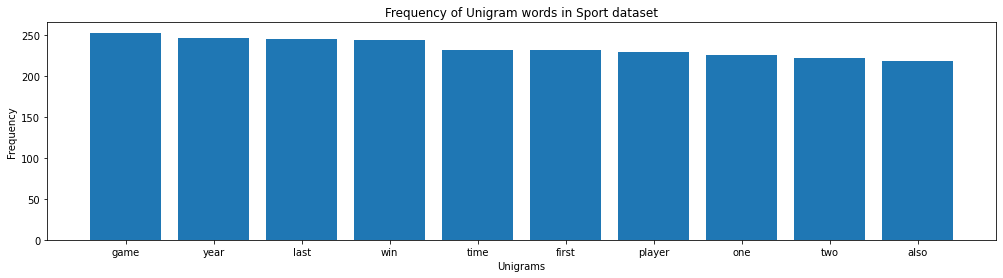

In [162]:
#plotting bar graph to see the frequency of Unigrams in dataset 
d1=df_sport_Unigrams[0][:10]
d2=df_sport_Unigrams[1][:10]

plt.figure(1, figsize=(17,4))
plt.title("Frequency of Unigram words in Sport dataset")
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
We can see that game,year,last and win are the unigrams mostly present in sport dataset

### Bigrams

In [176]:
#Method to generate bigram words
from nltk.corpus import stopwords

def generate_ngrams(text,n_gram=2,stop=True ):
    stop=set(stopwords.words("english")) if  stop else {}
    stop.add(('said'))
    stop.add(('could'))
    stop.add(('would'))
    stop.add(('two'))
    stop.add(('year'))
    token = {
        token for token in text.lower().split(" ") if token !="" if token not in stop
    }
    token=list(token)
    z=zip(*[token[i:] for i in range(n_gram)])
    ngrams=[" ".join(ngram) for ngram in z]
    return ngrams

In [177]:
#importing defaultdict from collections
from collections import defaultdict

In [178]:
#generating a defaultdict for business bigram
disaster_bigrams=defaultdict(int)


In [179]:
#generating the bigrams
for business in business_df.business:
    for word in generate_ngrams(business):
        disaster_bigrams[word]+=1

TypeError: 'set' object is not callable

In [ ]:
#dsplaying the bigrams
disaster_bigrams

In [168]:
#getting the top 10 bigrams sorted in descending order
df_disaster_bigrams=pd.DataFrame(
    sorted(disaster_bigrams.items(),key=lambda x: x[1],reverse=True)
)

In [169]:
#displaying the top 10 bigrams sorted in descending order
sorted(disaster_bigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('two year', 71),
 ('new say', 50),
 ('year higher', 47),
 ('us two', 47),
 ('also however', 47),
 ('however also', 40),
 ('group share', 40),
 ('us year', 37),
 ('strong economy', 33),
 ('one country', 33)]

In [170]:
#displaying the top 10 bigrams of politics dataset
df_disaster_bigrams.head(10)

,0,1
0,two year,71
1,new say,50
2,year higher,47
3,us two,47
4,also however,47
5,however also,40
6,group share,40
7,us year,37
8,strong economy,33
9,one country,33


#### Observation
we can see the top 10 technology bigrams

<BarContainer object of 10 artists>

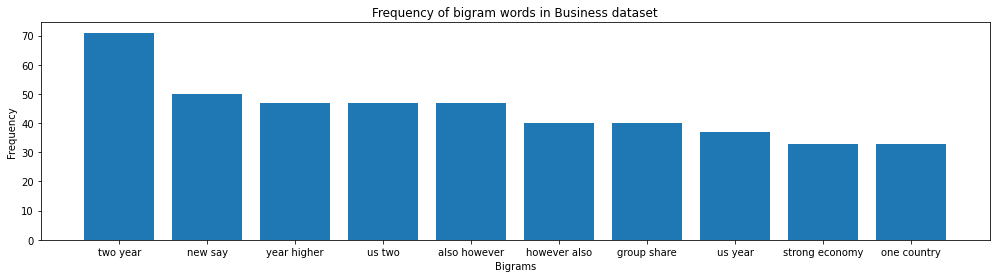

In [171]:
#plotting bar graph to see the frequency of bigrams in dataset 
d1=df_disaster_bigrams[0][:10]
d2=df_disaster_bigrams[1][:10]

plt.figure(1, figsize=(17,4))
plt.title("Frequency of bigram words in Business dataset")
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
We fing the economic year,company sale and company executive most number of bigrams

In [172]:
#method to display two words befor and after of hte bigrams in a sentence
def displayWrd_bef_aft(s,word,num=2):
    st = s.split(" ")
    word1 = word.split(' ')[0]
    word2 = word.split(' ')[1]
    found = -1
    minlen = -1
    maxlen = -1
    for i in range(0, len(st) - 1, 1):
        if st[i] == word1 and st[i+1] == word2:
            found = i
            break
    if found == -1:
        return ''
    if i - 2 > 0:
        minlen = i-2
    else:
        minlen = 0
        
    if i + 3 < len(st):
        maxlen = i+3
    else:
        maxlen = len(st)
    
    return " ".join(st[minlen : maxlen+1])

In [175]:
#getting the sentense around the most commonly used bigrams
p= {"phrase" : [], "new_sentence" : []}
for i in df_disaster_bigrams.head(3)[0]:
    for j in business_df['business']:
        #analyst['comapny also' 'new sentence']
        word = displayWrd_bef_aft(j,i)
        if word:
            p['phrase'].append(i)
            p['new_sentence'].append(word)
print(p)

{'phrase': ['two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year'], 'new_sentence': ['paying dividend two year focused cutting', 'industry last two year Illva Saronno', 'could take two year resolve Multiplex', 'target within two year However BoE', 'In last two year imposed penalty', ' past two year Nickel price', 'US suffered two year economic slowdown', 'tried merge two year ago talk', 'believe next two year domestic aviation', 'fastest rate two year Consumer spending', 'balanced next two year export stage', 'recovery past two year partly compensated', 'member least two year  December', 'fifth past two year growing slowly', ' month two year As part', 'season  two year time 

#### Observation
we can see phrase and new sentence around the bigrams

In [174]:
#storing the sentence and the phrase in a dataframe
business_bigram_sentence_df= pd.DataFrame.from_dict(p)
business_bigram_sentence_df

,phrase,new_sentence
0,two year,paying dividend two year focused cutting
1,two year,industry last two year Illva Saronno
2,two year,could take two year resolve Multiplex
3,two year,target within two year However BoE
4,two year,In last two year imposed penalty
5,two year,past two year Nickel price
6,two year,US suffered two year economic slowdown
7,two year,tried merge two year ago talk
8,two year,believe next two year domestic aviation
9,two year,fastest rate two year Consumer spending


#### Observation
From the sentence related to the bigrams we can observe that feul cost have increased ,Indian firms are expected to talk and company board members are becoming less,new firms are coming up and making progress

In [95]:
#generating a defaultdict for entertainment bigram
entertainment_bigrams=defaultdict(int)


In [96]:
#generating the bigrams
for entertainment in entertainment_df.entertainment:
    for word in generate_ngrams(entertainment):
        entertainment_bigrams[word]+=1

In [97]:
#displaying the bigrams
entertainment_bigrams

defaultdict(int,
            {'string everyday': 1,
             'everyday christmas': 1,
             'christmas photography': 1,
             'photography tree': 1,
             'tree londons': 1,
             'londons artists': 1,
             'artists charity': 1,
             'charity decorating': 1,
             'decorating known': 1,
             'known two': 1,
             'two grew': 2,
             'grew year': 3,
             'year packet': 1,
             'packet dress': 1,
             'dress jammed': 1,
             'jammed childrens': 1,
             'childrens art': 1,
             'art unveils': 1,
             'unveils previous': 1,
             'previous displayed': 1,
             'displayed moore': 1,
             'moore norway': 1,
             'norway artist': 1,
             'artist tracey': 1,
             'tracey subject': 1,
             'subject tate': 1,
             'tate bluetooth': 1,
             'bluetooth unveiled': 1,
             'unveiled also': 1

In [98]:
#sorting the bigrams in descending order
df_entertainment_bigrams=pd.DataFrame(
    sorted(entertainment_bigrams.items(),key=lambda x: x[1],reverse=True)
)

In [99]:
#getting the top 10 bigrams sorted in descending order
sorted(entertainment_bigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('two year', 54),
 ('show film', 38),
 ('year top', 35),
 ('us two', 33),
 ('also man', 32),
 ('one director', 29),
 ('number hit', 29),
 ('four us', 28),
 ('award oscar', 28),
 ('first record', 25)]

In [100]:
#displaying the top 10 bigrams of politics dataset
df_entertainment_bigrams.head(10)

,0,1
0,two year,54
1,show film,38
2,year top,35
3,us two,33
4,also man,32
5,one director,29
6,number hit,29
7,four us,28
8,award oscar,28
9,first record,25


#### Observation
we can see the top 10 technology bigrams

<BarContainer object of 10 artists>

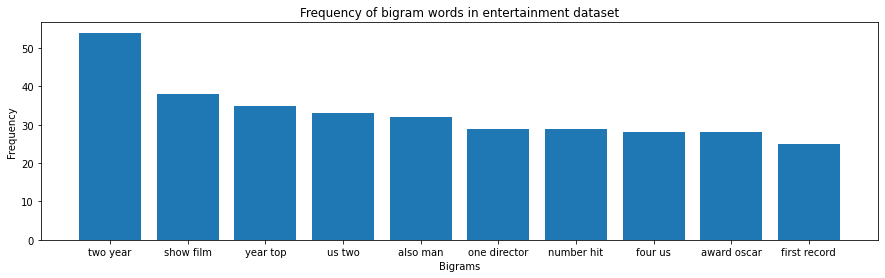

In [101]:
#plotting bar graph to see the frequency of bigrams in dataset 
d1=df_entertainment_bigrams[0][:10]
d2=df_entertainment_bigrams[1][:10]

plt.figure(1, figsize=(15,4))
plt.title("Frequency of bigram words in entertainment dataset")
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
 we can see that 'two actress','award year','also bbc','million music','awards director' are the most common bigrams used

In [102]:
#getting the sentense around the most commonly used bigrams
p= {"phrase" : [], "new_sentence" : []}
for i in df_entertainment_bigrams.head(7)[0]:
    for j in entertainment_df['entertainment']:
        #analyst['comapny also' 'new sentence']
        word = displayWrd_bef_aft(j,i,2)
        if word:
            p['phrase'].append(i)
            p['new_sentence'].append(word)
print(p)

{'phrase': ['two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'show film', 'year top', 'year top', 'year top', 'year top'], 'new_sentence': ['bestseller little two year set made', 'given every two year It reward', 'already sale two year If not', 'worldwide little two year It classic', 'drugged raped two year agoThe woman', 'leave band two year later', 'breakthrough act two year later Scottish', ' McFadden two year oldMcFadden whose', 'renewed vow two year ago She', ' nominated two year The ', 'team last two year Ms Clarkson', 'German hotel two year agoGallagher arrested', 'church incident two year ago Viacom', 'fourpiece met two year ago drummer', 'birth actually two year released another', 'pair together two year No wedding', 'film past two year The distressed', 'BPI worked two year caseAn operation', 'classic TV show fil

#### Observation
we can see phrase and new sentence around the bigrams

In [103]:
#storing the sentence and the phrase in a dataframe
entertainment_bigram_sentence_df= pd.DataFrame.from_dict(p)
entertainment_bigram_sentence_df

,phrase,new_sentence
0,two year,bestseller little two year set made
1,two year,given every two year It reward
2,two year,already sale two year If not
3,two year,worldwide little two year It classic
4,two year,drugged raped two year agoThe woman
5,two year,leave band two year later
6,two year,breakthrough act two year later Scottish
7,two year,McFadden two year oldMcFadden whose
8,two year,renewed vow two year ago She
9,two year,nominated two year The


#### Observation
In the entertainment category after analysisng the bigrams we see that Untouchables movies released  and many movies were nominated for Oscars this time

In [104]:
#generating a defaultdict for sport bigram
sport_bigrams=defaultdict(int)


In [105]:
#generating the bigrams
for sport in sport_df.sport:
    for word in generate_ngrams(sport):
        sport_bigrams[word]+=1

In [106]:
#displaying the bigrams
sport_bigrams

defaultdict(int,
            {'indoor smashed': 2,
             'smashed explain': 1,
             'explain long': 1,
             'long indoors': 1,
             'indoors mark': 2,
             'mark confident': 1,
             'confident season': 1,
             'season three': 27,
             'three hurdler': 1,
             'hurdler twice': 1,
             'twice owns': 1,
             'owns russian': 1,
             'russian year': 1,
             'year favourite': 15,
             'favourite fifthfastest': 1,
             'fifthfastest see': 1,
             'see regime': 1,
             'regime european': 1,
             'european month': 14,
             'month major': 1,
             'major previous': 1,
             'previous second': 10,
             'second jump': 1,
             'jump national': 1,
             'national madridthe': 1,
             'madridthe time': 2,
             'time championships': 9,
             'championships also': 9,
             'also hurdle': 8

In [107]:
#sorting the bigrams in descending order
df_sport_bigrams=pd.DataFrame(
    sorted(sport_bigrams.items(),key=lambda x: x[1],reverse=True)
)

In [108]:
#getting the top 10 bigrams sorted in descending order
sorted(sport_bigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('player team', 85),
 ('take last', 66),
 ('two year', 66),
 ('game match', 55),
 ('think told', 43),
 ('made world', 35),
 ('new say', 33),
 ('year top', 31),
 ('make lot', 29),
 ('also played', 29)]

In [109]:
#displaying the top 10 bigrams of politics dataset
df_sport_bigrams.head(10)

,0,1
0,player team,85
1,take last,66
2,two year,66
3,game match,55
4,think told,43
5,made world,35
6,new say,33
7,year top,31
8,make lot,29
9,also played,29


#### Observation
we can see the top 10 technology bigrams

<BarContainer object of 10 artists>

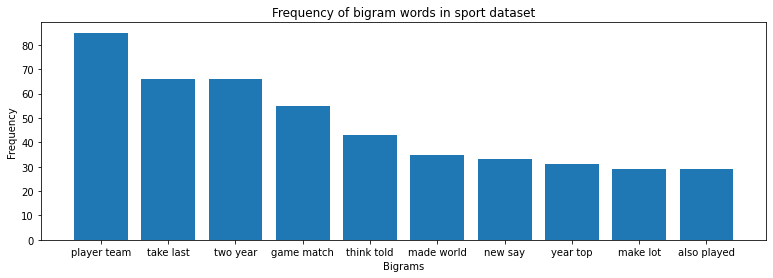

In [110]:
#plotting bar graph to see the frequency of bigrams in dataset 
d1=df_sport_bigrams[0][:10]
d2=df_sport_bigrams[1][:10]

plt.figure(1, figsize=(13,4))
plt.title("Frequency of bigram words in sport dataset")
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
We can see that 'well player','year made','win place','injury one' are the most number of bigrams generated

In [111]:
#getting the sentense around the most commonly used bigrams
p= {"phrase" : [], "new_sentence" : []}
for i in df_sport_bigrams.head(7)[0]:
    for j in sport_df['sport']:
        #analyst['comapny also' 'new sentence']
        word = displayWrd_bef_aft(j,i,2)
        if word:
            p['phrase'].append(i)
            p['new_sentence'].append(word)
print(p)

{'phrase': ['player team', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'two year', 'game match', 'game match', 'game match', 'think told'], 'new_sentence': ['want best player team he certainly', 'Dublin last two year', 'also banned two year IAAF He', 'Scot suspended two year  testing', 'medal banned two year said Pound', 'could suspended two year The duo', 'againChambers banned two year testing positive', 'six player two year manager ', 'new stadium two year He said', 'six month two year Football Association', 'scooter accident two year agoHe returned', 'Cup replay two year ago ', ' I two year still not', 'one care two year time world', 'England setup two year I know', 'playing Blues two year racked mileage', 'took another

#### Observation
we can see phrase and new sentence around the bigrams

In [112]:
#storing the sentence and the phrase in a dataframe
sport_bigram_sentence_df= pd.DataFrame.from_dict(p)
sport_bigram_sentence_df

,phrase,new_sentence
0,player team,want best player team he certainly
1,two year,Dublin last two year
2,two year,also banned two year IAAF He
3,two year,Scot suspended two year testing
4,two year,medal banned two year said Pound
5,two year,could suspended two year The duo
6,two year,againChambers banned two year testing positive
7,two year,six player two year manager
8,two year,new stadium two year He said
9,two year,six month two year Football Association


#### Observation
In the sports bigrams we can see that new players are getting chances and UEFA Cup results were declared and their are appearances of people

In [113]:
#generating a defaultdict for tech bigram
tech_bigrams=defaultdict(int)

In [114]:
#generating the bigrams
for tech in tech_df.tech:
    for word in generate_ngrams(tech):
        tech_bigrams[word]+=1

In [115]:
#displaying the bigrams
tech_bigrams

defaultdict(int,
            {'used technology': 39,
             'technology contributed': 1,
             'contributed others': 3,
             'others verify': 1,
             'verify showed': 1,
             'showed perceived': 1,
             'perceived president': 1,
             'president person': 1,
             'person notably': 1,
             'notably lighthowever': 1,
             'lighthowever changing': 1,
             'changing opposition': 1,
             'opposition ignorance': 1,
             'ignorance clear': 1,
             'clear work': 2,
             'work organizations': 1,
             'organizations building': 1,
             'building well': 1,
             'well dry': 1,
             'dry societythe': 1,
             'societythe towards': 1,
             'towards assuming': 1,
             'assuming agreed': 1,
             'agreed rural': 1,
             'rural assured': 1,
             'assured reached': 1,
             'reached allowing': 1,
           

In [116]:
#sorting the bigrams in descending order
df_tech_bigrams=pd.DataFrame(
    sorted(tech_bigrams.items(),key=lambda x: x[1],reverse=True)
)

In [117]:
#getting the top 10 bigrams sorted in descending order
sorted(tech_bigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('new say', 75),
 ('two year', 41),
 ('used technology', 39),
 ('service mr', 37),
 ('system user', 36),
 ('research one', 36),
 ('take last', 35),
 ('web online', 35),
 ('make lot', 35),
 ('online year', 34)]

In [118]:
#displaying the top 10 bigrams of politics dataset
df_tech_bigrams.head(10)

,0,1
0,new say,75
1,two year,41
2,used technology,39
3,service mr,37
4,system user,36
5,research one,36
6,take last,35
7,web online,35
8,make lot,35
9,online year,34


#### Observation
we can see the top 10 technology bigrams

<BarContainer object of 10 artists>

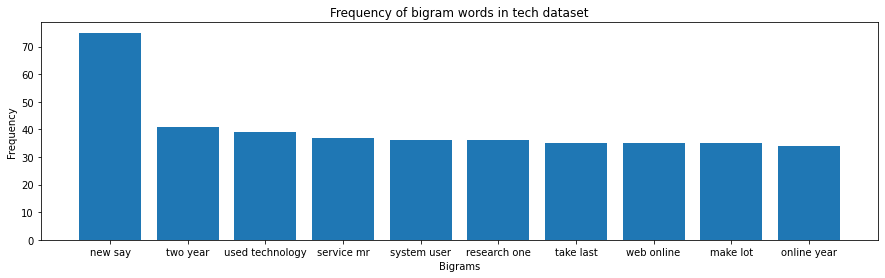

In [119]:
#plotting bar graph to see the frequency of bigrams in dataset 
d1=df_tech_bigrams[0][:10]
d2=df_tech_bigrams[1][:10]

plt.figure(1, figsize=(15,4))
plt.title("Frequency of bigram words in tech dataset")
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
We can see that 'also device' ,'technology us','product people','online technology' are the most bigrams used

In [120]:
#getting the setense around the most commonly used bigrams
p= {"phrase" : [], "new_sentence" : []}
for i in df_tech_bigrams.head(15)[0]:
    for j in tech_df['tech']:
        #analyst['comapny also' 'new sentence']
        word = displayWrd_bef_aft(j,i,2)
        if word:
            p['phrase'].append(i)
            p['new_sentence'].append(word)
print(p)

{'phrase': ['two year', 'two year', 'two year', 'two year', 'system user', 'make lot', 'make lot', 'online year', 'need work'], 'new_sentence': ['After almost two year tantalising preview', 'made last two year In ', 'made last two year In ', 'size taking two year complete title', 'spam filtering system user said going', 'money always make lot money Once', 'money always make lot money Once', 'gift buying online year report industry', 'growing growing need work closely people']}


#### Observation
we can see phrase and new sentence around the bigrams

In [121]:
#storing the sentence and the phrase in a dataframe
tech_bigram_sentence_df= pd.DataFrame.from_dict(p)
tech_bigram_sentence_df

,phrase,new_sentence
0,two year,After almost two year tantalising preview
1,two year,made last two year In
2,two year,made last two year In
3,two year,size taking two year complete title
4,system user,spam filtering system user said going
5,make lot,money always make lot money Once
6,make lot,money always make lot money Once
7,online year,gift buying online year report industry
8,need work,growing growing need work closely people


#### Observation
we can see that in technology sector many steps are being taken to uplift the technology and bring new revolutions to the feild by making robot or system embeded and IBM is also trying to make dominance in the feild

In [122]:
#generating a defaultdict for politics bigram
politics_bigrams=defaultdict(int)

In [123]:
#generating the bigrams
for politics in politics_df.politics:
    for word in generate_ngrams(politics):
        politics_bigrams[word]+=1

In [124]:
#displaying the bigrams
politics_bigrams

defaultdict(int,
            {'david tories': 8,
             'tories employer': 2,
             'employer ms': 1,
             'ms blair': 4,
             'blair mean': 10,
             'mean detail': 2,
             'detail parliament': 5,
             'parliament industry': 3,
             'industry definitely': 1,
             'definitely partner': 1,
             'partner closer': 1,
             'closer party': 1,
             'party father': 1,
             'father sunday': 1,
             'sunday giving': 1,
             'giving see': 3,
             'see salary': 1,
             'salary extend': 1,
             'extend allow': 3,
             'allow month': 8,
             'month older': 1,
             'older thats': 1,
             'thats firm': 1,
             'firm hewitt': 1,
             'hewitt retraining': 1,
             'retraining carers': 1,
             'carers recruitment': 1,
             'recruitment woman': 1,
             'woman increased': 4,
             'i

In [125]:
#sorting the bigrams in descending order
df_politics_bigrams=pd.DataFrame(
    sorted(politics_bigrams.items(),key=lambda x: x[1],reverse=True)
)

In [126]:
#getting the top 10 bigrams sorted in descending order
sorted(politics_bigrams.items(),key=lambda x: x[1],reverse=True)[:10]

[('new say', 94),
 ('public also', 51),
 ('government time', 51),
 ('bbc labour', 48),
 ('say put', 47),
 ('also problem', 44),
 ('think told', 43),
 ('expected told', 42),
 ('liberal uk', 39),
 ('mr face', 38)]

In [127]:
#displaying the top 10 bigrams of politics dataset
df_politics_bigrams.head(10)

,0,1
0,new say,94
1,public also,51
2,government time,51
3,bbc labour,48
4,say put,47
5,also problem,44
6,think told,43
7,expected told,42
8,liberal uk,39
9,mr face,38


#### Observation
we can see the top 10 politics bigrams

<BarContainer object of 10 artists>

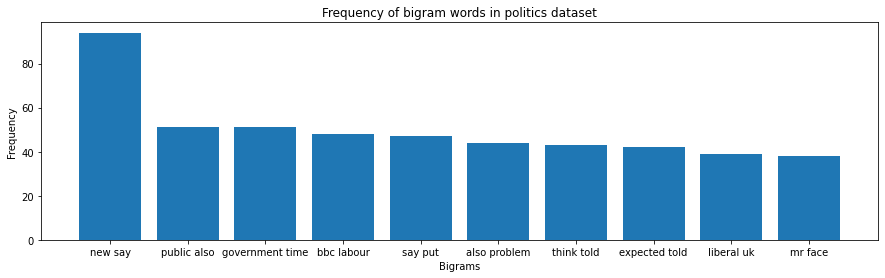

In [128]:
#plotting bar graph to see the frequency of bigrams in dataset 
d1=df_politics_bigrams[0][:10]
d2=df_politics_bigrams[1][:10]

plt.figure(1, figsize=(15,4))
plt.title("Frequency of bigram words in politics dataset")
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.bar(d1,d2)


#### Observation
we can see that 'britain would' and 'public also', 'year made' are the most common bigrams in the dataset 

In [129]:
#getting the setense around the most commonly used bigrams
p= {"phrase" : [], "new_sentence" : []}
for i in df_politics_bigrams.head(15)[0]:
    for j in politics_df['politics']:
        #analyst['comapny also' 'new sentence']
        word = displayWrd_bef_aft(j,i,2)
        if word:
            p['phrase'].append(i)
            p['new_sentence'].append(word)
print(p)

{'phrase': ['government time', 'government time', 'think told', 'made election', 'government local'], 'new_sentence': ['vote Labour government time around They', 'bad news government time trying explain', 'I dont think told joint committee', 'keep promise made election  said', 'abroad Still government local council employ']}


#### Observation
we can see phrase and new sentence around the bigrams

In [130]:
#storing the sentence and the phrase in a dataframe
politics_bigram_sentence_df= pd.DataFrame.from_dict(p)
politics_bigram_sentence_df

,phrase,new_sentence
0,government time,vote Labour government time around They
1,government time,bad news government time trying explain
2,think told,I dont think told joint committee
3,made election,keep promise made election said
4,government local,abroad Still government local council employ


#### Observation
we can see that the phrases the most phrase used 'year made' has a sentense past year made living average 
and the other bigrams suggest that the government is not giving response properly and their are tax plans being used and implemented 

## Conclusion
1) Through sentiment analysis of all the dataset we say that all the news are statement which justifies it self as the positive and negetive sentiments were less as compared to neutral

2) From wordcloud we say that said was the most common word in allthe datasets as most of the news are delivered directly in speech for and apart from that we see government and party commonly words in politics|| game technology,software most common words in tech || similarly in sports the common words were win,team,game,play,club ||in entertainment it was film,award,music,show,star || in business it was firm,company,market,government,sale,growth

3) From unigrams we say in business dataset US,firm,company are the most commonly spoken unigrams

4) From unigrams we say in sport  dataset game,win,time,player and first are the mostly spoken unigrams

5) from unigrams we say in entertainment dataset film,star,US,show are few of the most commonly used unigrams


## Analysis from dataset

#### For the Business dataset
 We see that few countries have a high performance in economy and their is a boost in the stock exchange as the restrictions of COVID are getting over so the economy is also getting good overall so we can see the growth in stock market and Indian firms and many new firms are coming up but 
 
 The fuel prices keeps on rising
 
 while many company executives are resigning as the possible reson can be companies are not paying them properly
 
#### From the Entertainment dataset

We see that many movies are getiing nominated to oscars and after covid this as restrictions are being lifted more and more movies are coming out and this can be the reawakening of the cinemas again and 

Untouchables that released this year made to top4 rankings in the ratings

#### From the Sprots dataset

We can see that UEFA cup was conducted this year and the results were declared 

As this year many youngstars are getiing chance this year 

Player that made appearance after seven year of rest

#### From the Technology dataset

We see that everyone is going towards new technology and soon we will be able to see a technology revolution which has already started  

IBM is trying to make dominance in the IT world

Many security breaches are happening as the use of technology increases we see concern for tech security

NOw a days technology is also being used in sports to analyse player

#### From the Politics dataset

We see that the new goverment has made the life of people average as they are not taking good measures to ensure the well being

The new tax plans are being implemented and people are using them 

New fuel duty being imposed as the fuel policy comes to power which is affecting the fuel prices


## Final conclusion

We see that many goverments are not doing anything for the betterment of the people.Their are technology advancements happening at the same time the safety towards the data in the technology is being compromised.As the fuel policy is passing this year so we see the prices of feul getting affected.After covid we see reopening of cinemas and people are going to watch them as a result of which it is good for the economy growth.IBM is trying to secure top position while after covid restrictions are lift people are getting jobs and working which  is generating wealth and improving the economy